In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('study1.csv')

# Display the first few rows of the dataframe
print(df.head())

        Age  Gender Educational Background: Country of Residence  \
0   25 - 34    Male         Master's Degree             Pakistan   
1  Under 18    Male    High School or lower             Pakistan   
2   18 - 24  Female    High School or lower             Pakistan   
3   18 - 24    Male    High School or lower             Pakistan   
4   18 - 24    Male       Bachelor's Degree             Pakistan   

     Experience with AI or Computer-Generated Images  \
0  I have some experience (have taken courses or ...   
1  I'm an expert (work with AI or CGI professiona...   
2              I've heard of it but don't know much.   
3  I have some experience (have taken courses or ...   
4   I'm familiar but don't have hands-on experience.   

  How often do you view digital images or graphics (including online, in games, movies, etc.)?  \
0                               Multiple times a day                                             
1                                             Weekly      

In [2]:
# Check for missing values
print(df.isnull().sum())

Age                                                                                          0
Gender                                                                                       0
Educational Background:                                                                      0
Country of Residence                                                                         0
Experience with AI or Computer-Generated Images                                              0
                                                                                            ..
DELLE3-Caption Matching - I feel the image is a true representation of the given caption.    1
DELLE3-Image Quality - The image is clear and sharp.                                         0
DELLE3-Image Quality - The colors in the image are vibrant and lifelike.                     0
DELLE3-Image Quality - I am satisfied with the overall quality of this image.                0
DELLE3-Image Quality - The resolution of the image

In [3]:
# Summary statistics for the numeric data
print(df.describe())

       Orignal-Photorealism - The image looks like a photograph of a real scene.  \
count                                         360.000000                           
mean                                            4.122222                           
std                                             1.135183                           
min                                             1.000000                           
25%                                             4.000000                           
50%                                             4.000000                           
75%                                             5.000000                           
max                                             5.000000                           

       Orignal-Photorealism - I can easily imagine seeing this image in the real world.  \
count                                         360.000000                                  
mean                                            4.297222     

In [5]:
df = df.dropna(subset=['Age', 'Gender', 'Educational Background:', 'Country of Residence'])

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

In [4]:
# Example: Calculate average ratings for each AI model's photorealism
photorealism_columns = [col for col in df.columns if 'Photorealism' in col]
df[photorealism_columns].mean()

# Example: Group by gender and compare means
grouped_data = df.groupby('Gender').mean()
print(grouped_data)


                           Orignal-Photorealism - The image looks like a photograph of a real scene.  \
Gender                                                                                                 
Female                                                              4.264901                           
Male                                                                4.014706                           
Non-binary / third gender                                           4.200000                           

                           Orignal-Photorealism - I can easily imagine seeing this image in the real world.  \
Gender                                                                                                        
Female                                                              4.443709                                  
Male                                                                4.191176                                  
Non-binary / third gender          

/tmp/ipykernel_1454558/1815566290.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df.groupby('Gender').mean()


In [8]:
# Detailed statistics for photorealism ratings by Gender
photorealism_columns = [col for col in df.columns if 'Photorealism' in col]
print(df.groupby('Gender')[photorealism_columns].describe())


                          Orignal_Photorealism___The_image_looks_like_a_photograph_of_a_real_scene.  \
                                                                                              count   
Gender                                                                                                
Female                                                                 151.0                          
Male                                                                   204.0                          
Non-binary / third gender                                                5.0                          

                                                                        \
                               mean       std  min  25%  50%  75%  max   
Gender                                                                   
Female                     4.264901  1.093630  1.0  4.0  5.0  5.0  5.0   
Male                       4.014706  1.155317  1.0  4.0  4.0  5.0  5.0   
Non-binary 

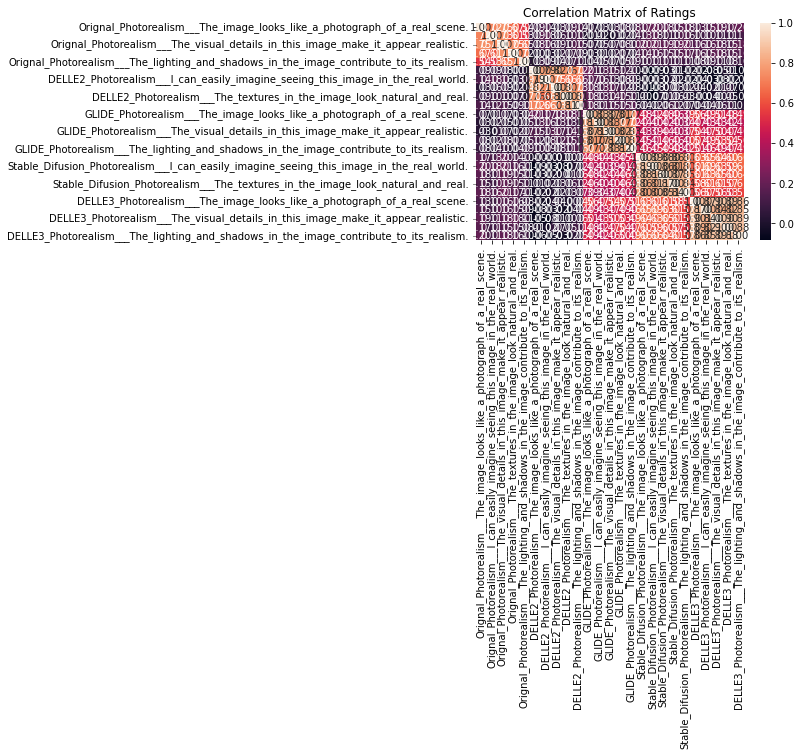

In [9]:
# Select columns related to ratings
rating_columns = [col for col in df.columns if 'Photorealism' in col or 'Image Quality' in col or 'Caption Matching' in col]

# Compute correlation matrix
correlation_matrix = df[rating_columns].corr()

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix of Ratings')
plt.show()


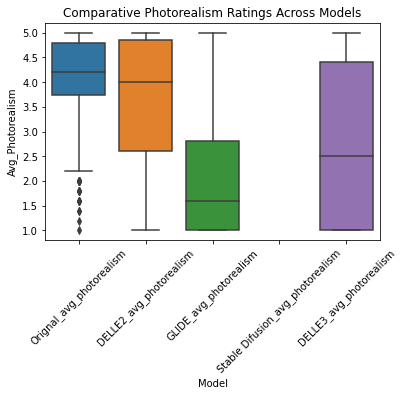

In [10]:
models = ['Orignal', 'DELLE2', 'GLIDE', 'Stable Difusion', 'DELLE3']
for model in models:
    model_columns = [col for col in df.columns if model in col and 'Photorealism' in col]
    df[model + '_avg_photorealism'] = df[model_columns].mean(axis=1)

model_photorealism_columns = [model + '_avg_photorealism' for model in models]
df_melted = df.melt(value_vars=model_photorealism_columns, var_name='Model', value_name='Avg_Photorealism')

sns.boxplot(x='Model', y='Avg_Photorealism', data=df_melted)
plt.title('Comparative Photorealism Ratings Across Models')
plt.xticks(rotation=45)
plt.show()


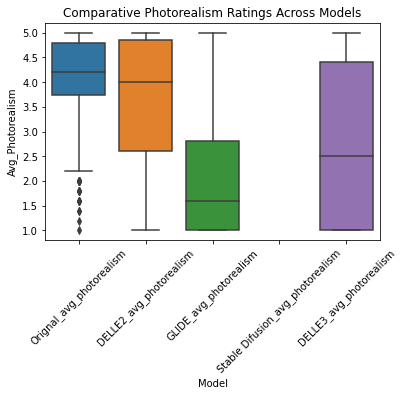

In [11]:
# Example: Compare photorealism across different models
models = ['Orignal', 'DELLE2', 'GLIDE', 'Stable Difusion', 'DELLE3']
for model in models:
    model_columns = [col for col in df.columns if model in col and 'Photorealism' in col]
    df[model + '_avg_photorealism'] = df[model_columns].mean(axis=1)

model_photorealism_columns = [model + '_avg_photorealism' for model in models]
df_melted = df.melt(value_vars=model_photorealism_columns, var_name='Model', value_name='Avg_Photorealism')

sns.boxplot(x='Model', y='Avg_Photorealism', data=df_melted)
plt.title('Comparative Photorealism Ratings Across Models')
plt.xticks(rotation=45)
plt.show()


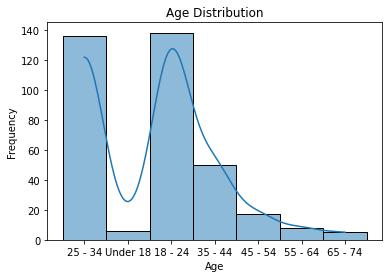

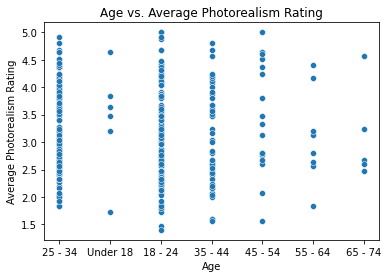

In [14]:
# Plotting age distribution
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Age vs. average photorealism rating across all models
df['average_photorealism'] = df[photorealism_columns].mean(axis=1)
sns.scatterplot(x='Age', y='average_photorealism', data=df)
plt.title('Age vs. Average Photorealism Rating')
plt.xlabel('Age')
plt.ylabel('Average Photorealism Rating')
plt.show()
